In [1]:
import pandas as pd

FILENAME = 'resource_usage.csv'

df = pd.read_csv(
    FILENAME,
    sep=';',
    header=0,
)
resource_usages = dict(zip(df.columns, df.iloc[0]))
resource_usages.pop('Unnamed: 0')
resource_usages

{'native_MVNN': 5,
 'base_NN': 7,
 'posthoc_CP_NN': 6,
 'posthoc_LA_NN': 1,
 'native_QHGBR': 5,
 'base_HGBR': 2,
 'posthoc_CP_HGBR': 2,
 'native_QR': 5,
 'base_Linreg': 1,
 'posthoc_CP_Linreg': 1,
 'native_GP': 3}

saving
showing


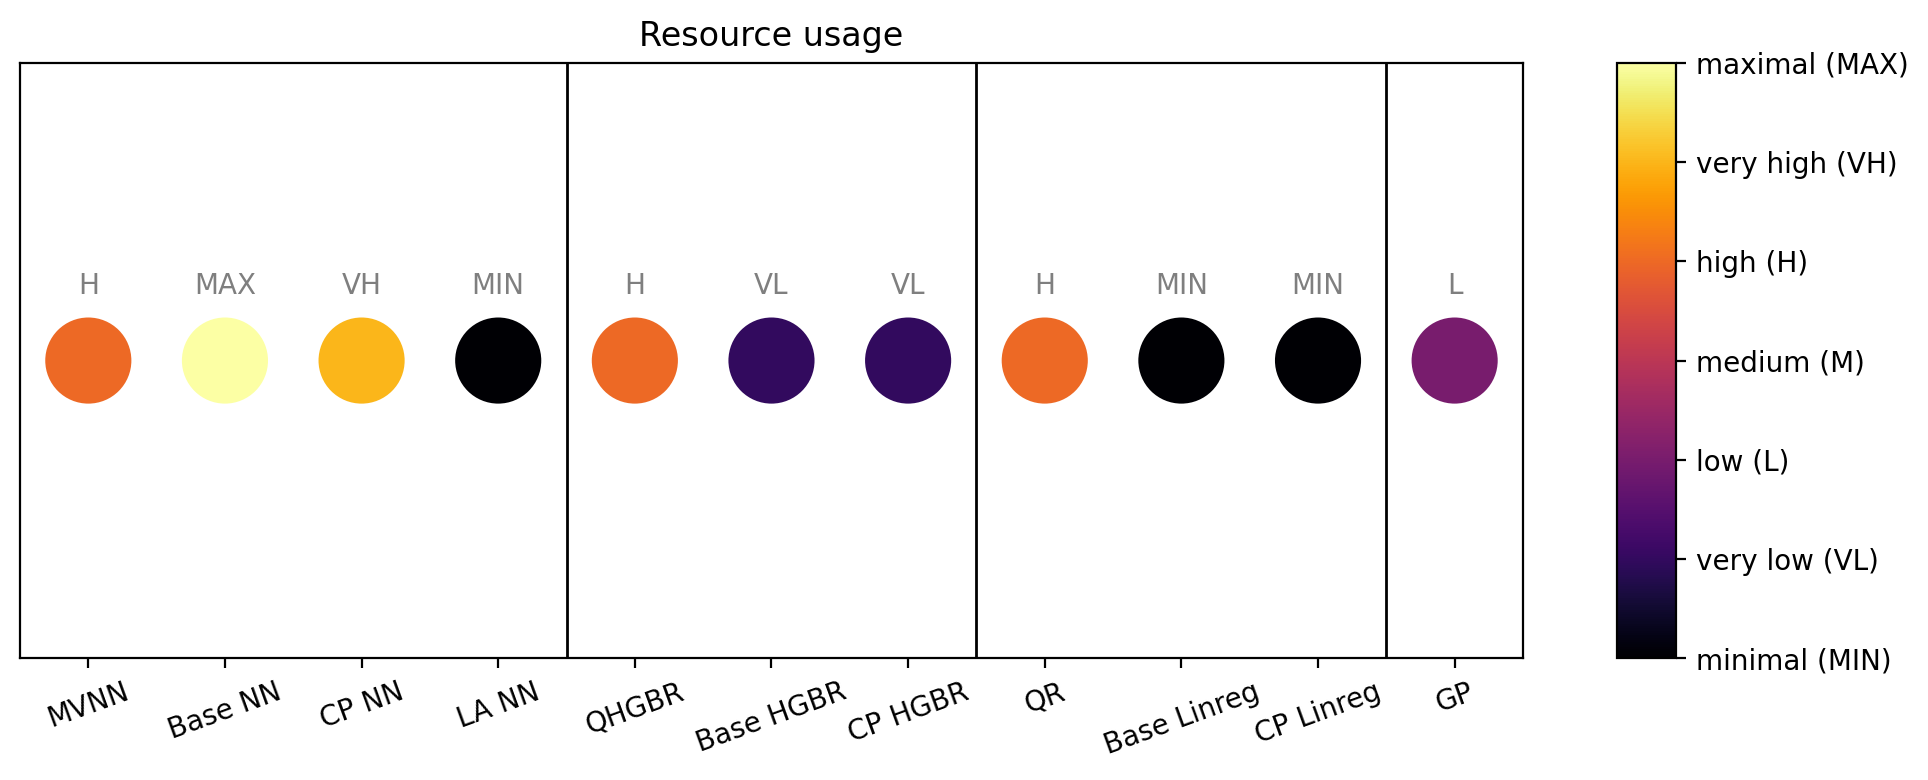

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


def _update_prefix(string):
    old_string = string
    new_string = ' '.join(old_string.split('_')[1:])
    if old_string.startswith('base_'):
        new_string = f'Base {new_string}'
    return new_string


DPI = 200
FILEPATH = 'comparison_storage/plots/resource_usages.pdf'
CMAP = 'inferno'
CBAR_ASPECT = 10
TEXT_Y = 0.25  # 1 is top, 0 is middle
TEXT_ALPHA = 0.5
USAGE_TO_STR_DICT = {
    1: ['minimal (MIN)', 'MIN'],
    2: ['very low (VL)', 'VL'],
    3: ['low (L)', 'L'],
    4: ['medium (M)', 'M'],
    5: ['high (H)', 'H'],
    6: ['very high (VH)', 'VH'],
    7: ['maximal (MAX)', 'MAX'],
}

group_sizes = [4, 3, 3, 1]
cum_group_sizes = np.cumsum(group_sizes)

shift = 0.5
x_plot = np.arange(len(resource_usages))

x_min, x_max = x_plot.min() - shift, x_plot.max() + shift
vlines_xs = [x_min + cum_group_size for cum_group_size in cum_group_sizes]

# fig, axs = plt.subplots(3, 4, figsize=(15,6))
fig, ax = plt.subplots(figsize=(10, 4), dpi=DPI)
plt.title('Resource usage')

# for ax in axs:
ax.scatter(x_plot, np.zeros_like(x_plot), c=resource_usages.values(), cmap=CMAP, s=30**2)

for x, usage in zip(x_plot, resource_usages.values()):
    usage_str = USAGE_TO_STR_DICT[usage][1]
    ax.text(x, TEXT_Y, usage_str, va='center', ha='center', alpha=TEXT_ALPHA)

ax.set_yticks([])
labels = [_update_prefix(label) for label in resource_usages.keys()]
ax.set_xlim(x_min, x_max)
ax.set_ylim(-1, 1)
ax.set_xticks(x_plot, labels, rotation=20)
# ax.xaxis.set_ticks_position('none')
for x in vlines_xs:
    ax.axvline(x, color='black', linewidth=1)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=CMAP, norm=mpl.colors.Normalize(1, 7)), ax=ax, aspect=CBAR_ASPECT)  #pad=0.03
cbar.set_ticks(np.arange(1, 7+1))
cbar.set_ticklabels([v[0] for v in USAGE_TO_STR_DICT.values()])
plt.tight_layout()
if FILEPATH is not None:
    print('saving')
    plt.savefig(FILEPATH)
print('showing')